In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df =pd.read_csv('StudentsPerformance.csv')
df.head(7)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92


In [4]:
df.shape

(1000, 8)

In [6]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [18]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [19]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [21]:
print("gender unique variable :",df["gender"].unique())
print("unique race/ehenicity :",df["race/ethnicity"].unique())
print("unique parental level of education :",df["parental level of education"].unique())
print(" unique lunch :",df["lunch"].unique())
print("unique test preparation course :",df["test preparation course"].unique())

gender unique variable : ['female' 'male']
unique race/ehenicity : ['group B' 'group C' 'group A' 'group D' 'group E']
unique parental level of education : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
 unique lunch : ['standard' 'free/reduced']
unique test preparation course : ['none' 'completed']


In [31]:
numaric_feature=[featurs for featurs in df.columns if df[featurs].dtype!="O"]

categorial_feature=[features for features in df.columns if df[features].dtype=="O" ]


print(f"number of numeric featurs {len(numaric_feature)} : ",numaric_feature)
print(f"number of categories featurs {len(categorial_feature)} :",categorial_feature)

number of numeric featurs 3 :  ['math score', 'reading score', 'writing score']
number of categories featurs 5 : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [32]:
df['total score']=df[numaric_feature[0]]+df[numaric_feature[1]]+df[numaric_feature[2]]

df['average']=df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [37]:
rea_full=df[df['reading score']==100]['reading score'].count()
wri_full=df[df['writing score']==100]['writing score'].count()
math_full=df[df['math score']==100]['math score'].count()
print(f'number of student with full marks in math :{math_full}')
print(f'number of student with full marks in reading :{rea_full}')
print(f'number of student with full marks in writing :{wri_full}')

number of student with full marks in math :7
number of student with full marks in reading :17
number of student with full marks in writing :14


In [39]:
rea_full=df[df['reading score']>=50]['reading score'].count()
wri_full=df[df['writing score']>=50]['writing score'].count()
math_full=df[df['math score']>=50]['math score'].count()
print(f'number of student with 50 marks in math :{math_full}')
print(f'number of student with 50 marks in reading :{rea_full}')
print(f'number of student with 50 marks in writing :{wri_full}')

number of student with 50 marks in math :865
number of student with 50 marks in reading :910
number of student with 50 marks in writing :886


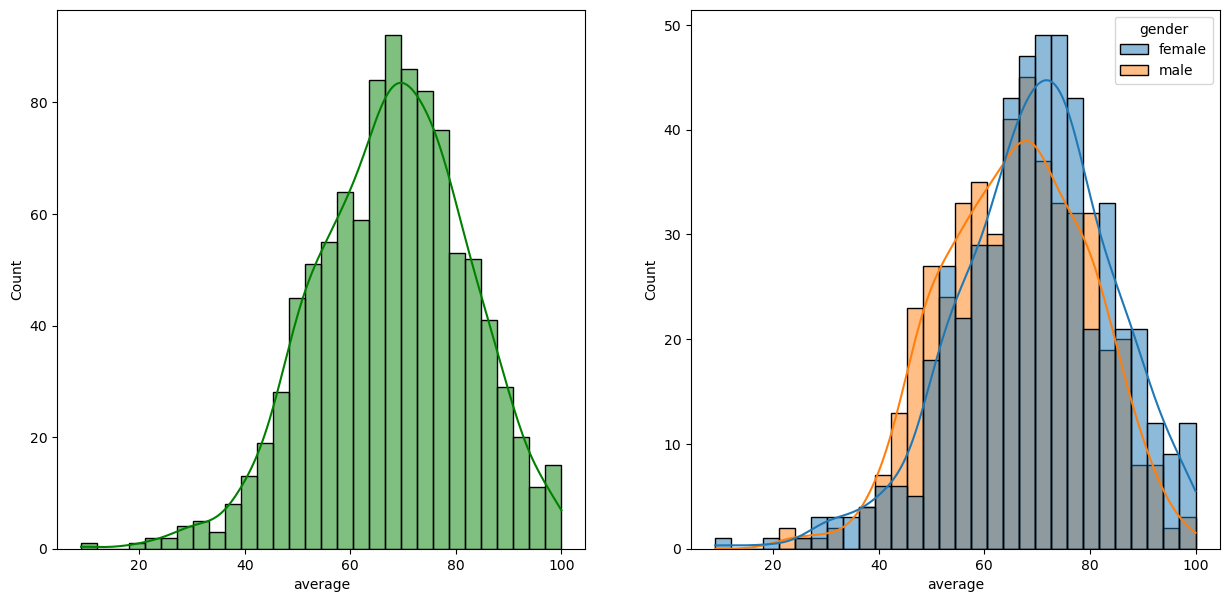

In [48]:
fig,axe=plt.subplots(1,2,figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(data=df,x='average',bins=30,color='g',kde=True)
plt.subplot(1,2,2)
sns.histplot(data=df,x='average',bins=30,hue='gender',kde=True)
plt.show()


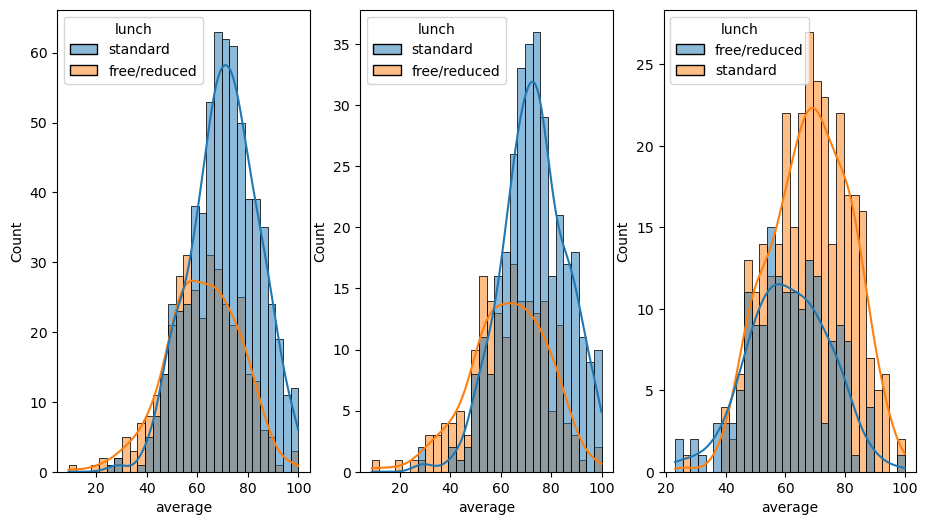

In [56]:
fig,axs=plt.subplots(1,3,figsize=(15,6))
plt.subplot(141)
sns.histplot(df,x='average',bins=30,kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',bins=30,kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',bins=30,kde=True,hue='lunch')

plt.show()

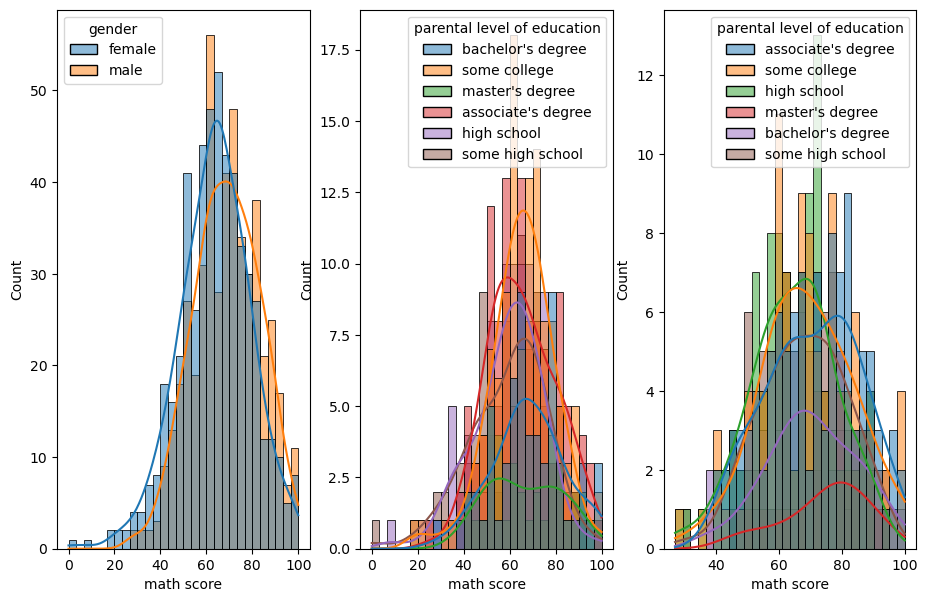

In [64]:
fig,axe=plt.subplots(2,3,figsize=(15,7))
plt.subplot(141)
sns.histplot(data=df,x='math score',bins=30,kde=True,hue='gender')

plt.subplot(142)

sns.histplot(data=df[df.gender=='female'],x='math score',bins=30,kde=True,hue='parental level of education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='math score',bins=30,kde=True,hue='parental level of education')



plt.show()

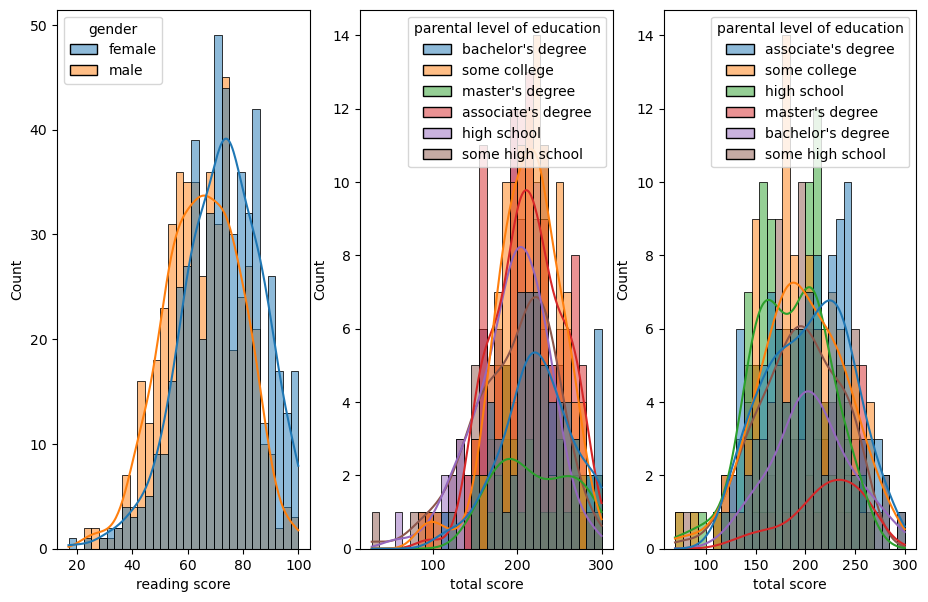

In [67]:
fig,axe=plt.subplots(2,3,figsize=(15,7))
plt.subplot(141)
sns.histplot(data=df,x='reading score',bins=30,kde=True,hue='gender')

plt.subplot(142)

sns.histplot(data=df[df.gender=='female'],x='total score',bins=30,kde=True,hue='parental level of education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='total score',bins=30,kde=True,hue='parental level of education')



plt.show()

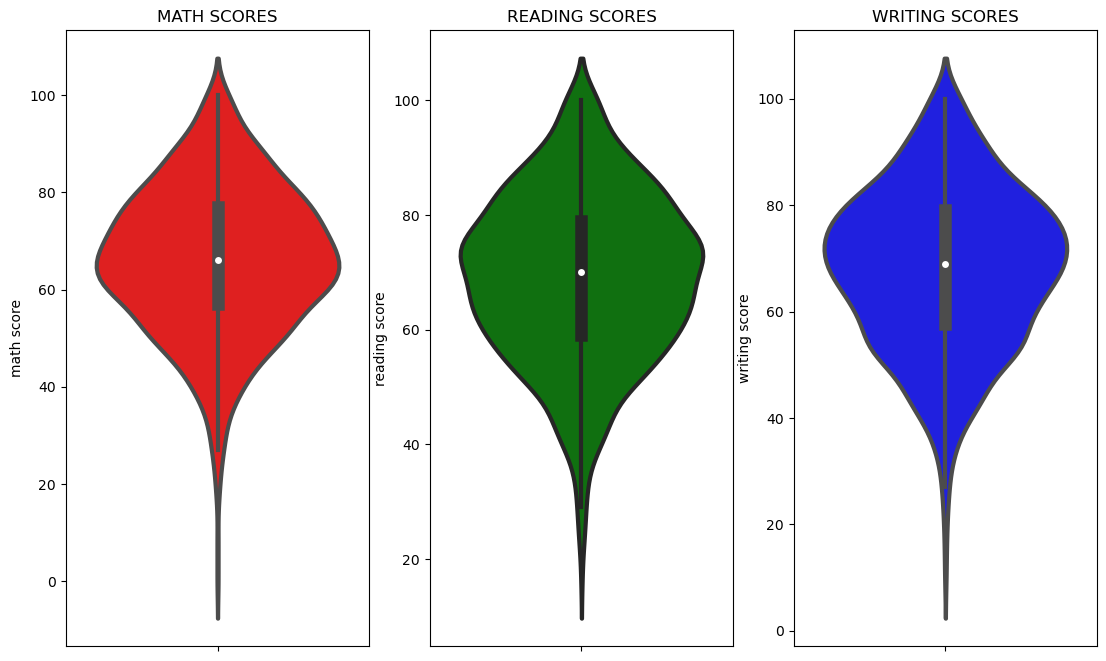

In [68]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

In [73]:
size=df['gender'].value_counts()
size

female    518
male      482
Name: gender, dtype: int64

In [83]:
print(categorial_feature)

df.head(1)

['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667


(-1.25, 1.25, -1.25, 1.25)

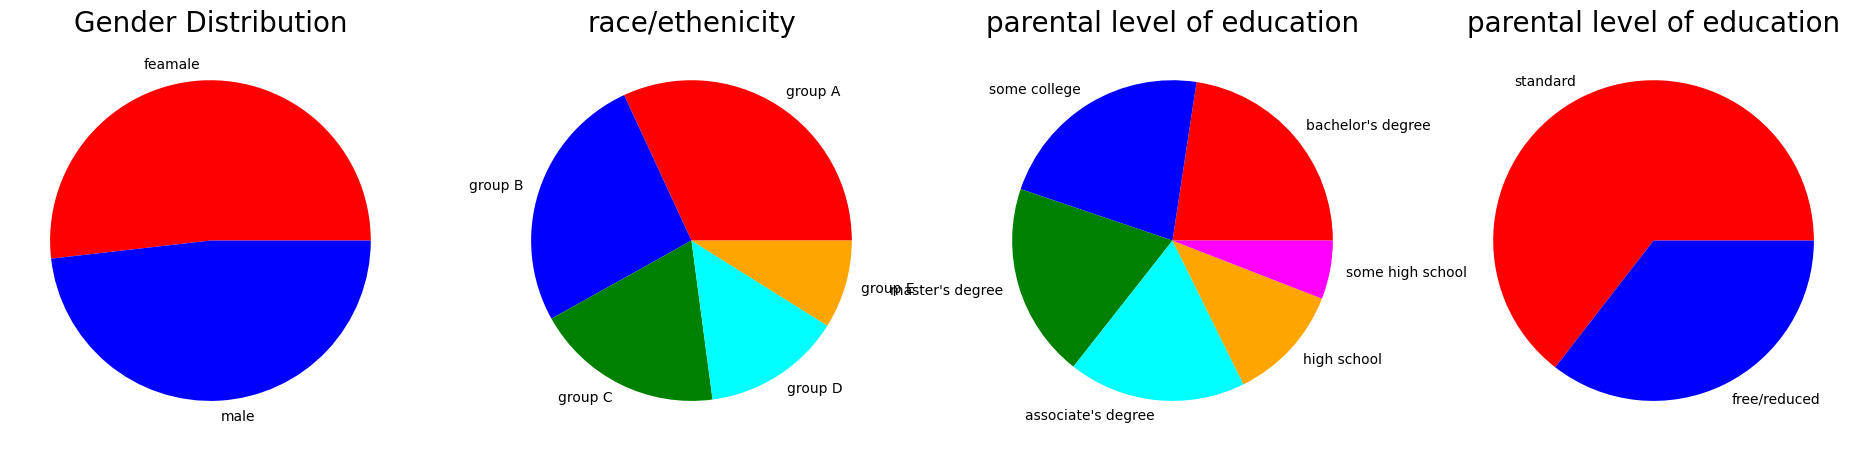

In [86]:
plt.rcParams['figure.figsize']=(30,15)

plt.subplot(151)
size=df['gender'].value_counts()
labels='feamale','male'
color=['red','blue']

plt.pie(x=size,labels=labels,colors=color)
plt.title('Gender Distribution',fontsize=20)
plt.axis('off')

plt.subplot(152)

size=df['race/ethnicity'].value_counts()
labels='group A','group B','group C','group D','group E'
color=['red','blue','green','cyan','orange']

plt.pie(x=size,labels=labels,colors=color)
plt.title('race/ethenicity',fontsize=20)
plt.axis('off')

plt.subplot(153)

size=df['parental level of education'].value_counts()
labels="bachelor's degree" ,'some college' ,"master's degree", "associate's degree",'high school' ,'some high school'
color=['red','blue','green','cyan','orange','magenta']

plt.pie(x=size,labels=labels,colors=color)
plt.title('parental level of education',fontsize=20)
plt.axis('off')


plt.subplot(154)

size=df['lunch'].value_counts()
labels='standard' ,'free/reduced'
color=['red','blue']

plt.pie(x=size,labels=labels,colors=color)
plt.title('parental level of education',fontsize=20)
plt.axis('off')


plt.subplot(155)

size=df['lunch'].value_counts()
labels='standard' ,'free/reduced'
color=['red','blue']

plt.pie(x=size,labels=labels,colors=color)
plt.title('parental level of education',fontsize=20)
plt.axis('off')





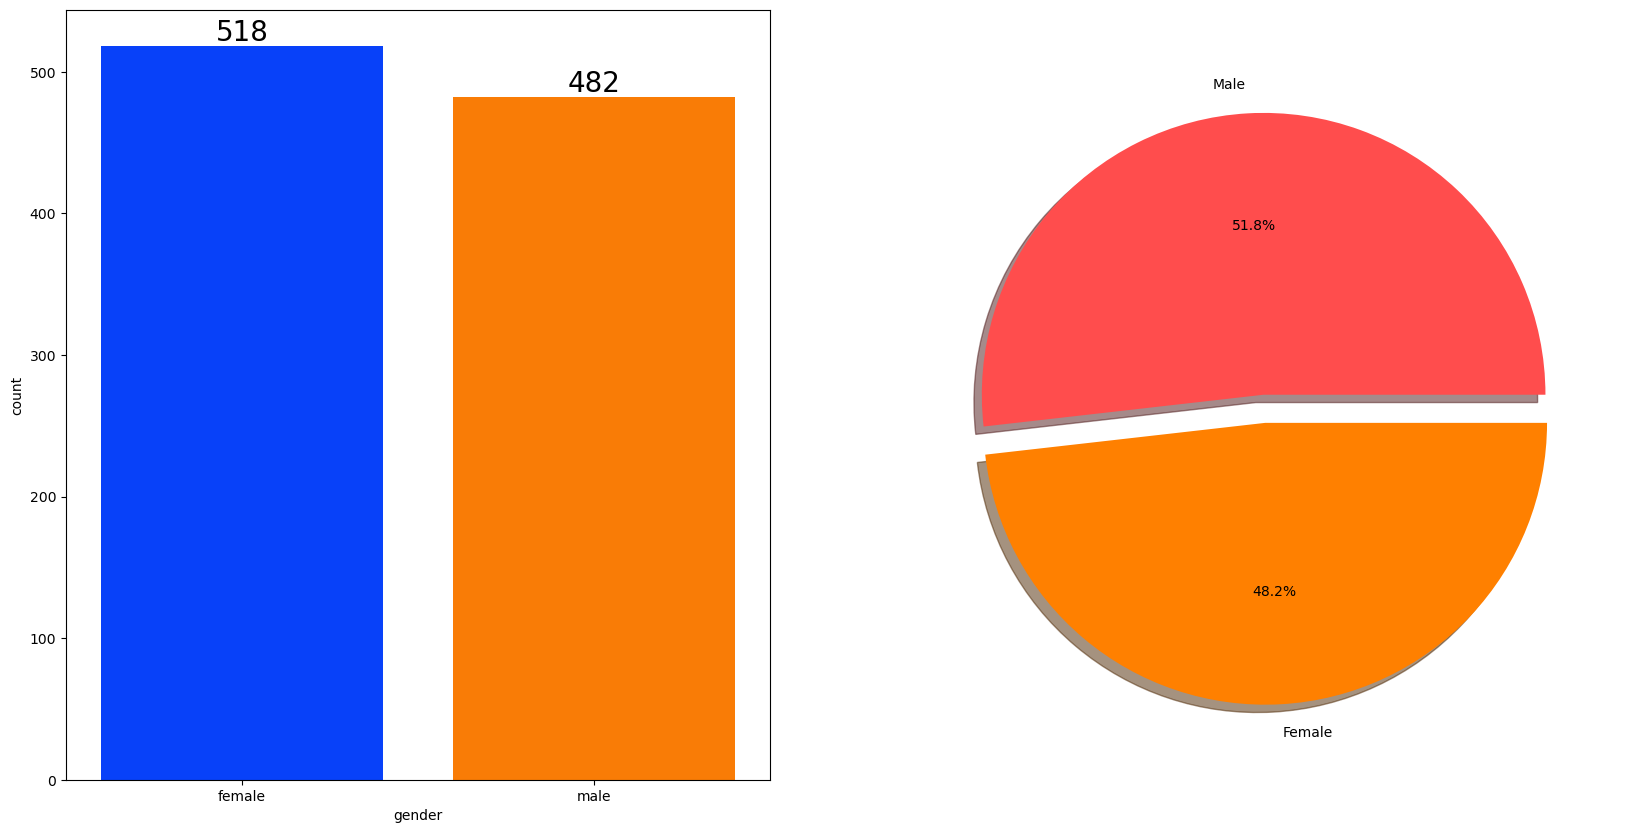

In [87]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

In [88]:
gender_group = df.groupby('gender').mean()
gender_group

,math score,reading score,writing score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


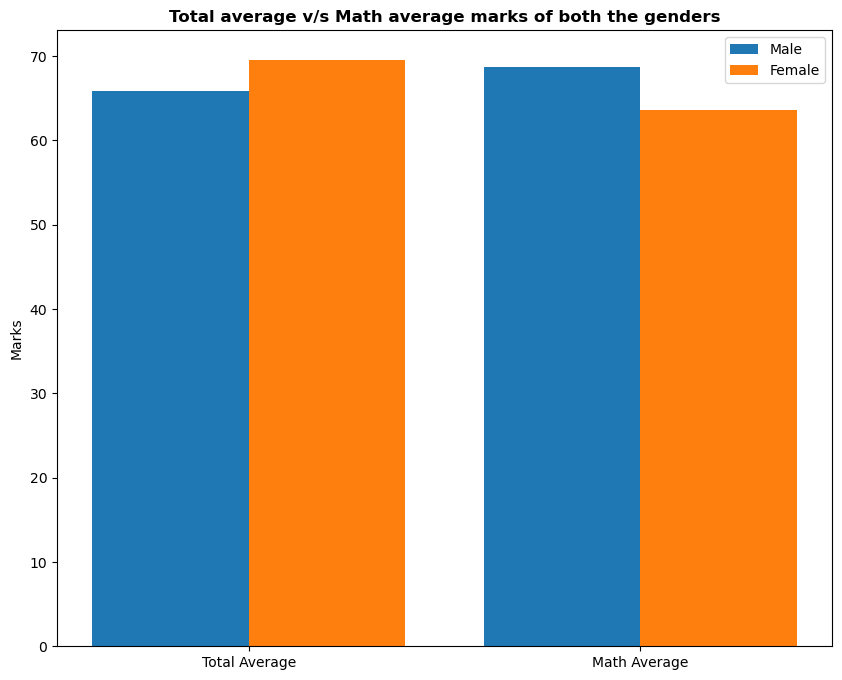

In [89]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()